In [7]:
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df_DA_US = df[df['job_country'] == 'United States']

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df_DA_US['job_skills'] = df_DA_US['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

C:\Users\14312\AppData\Local\Temp\ipykernel_13632\660901072.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DA_US['job_skills'] = df_DA_US['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)


In [ ]:
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')
df_DA_US_exploded = df_DA_US.explode('job_skills')

,salary_year_avg,job_skills
92,120000.0,sql
92,120000.0,python
100,228222.0,sql
100,228222.0,r
100,228222.0,python
100,228222.0,express
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau


In [16]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DA_skills = df_DA_skills.rename(columns = {'count':'skill_count','median':'median_salary'})

DA_job_count = len(df_DA_US)
df_DA_skills['skill_percent'] = (df_DA_skills['skill_count']/DA_job_count) * 100

df_DA_skills = df_DA_skills.sort_values(by='skill_percent',ascending=False).head(10)

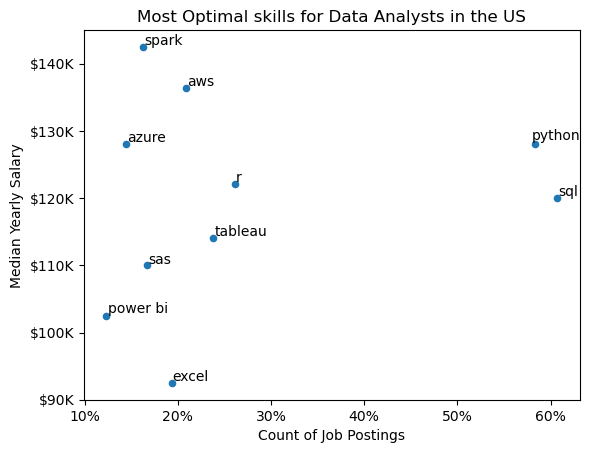

In [27]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

# Create the scatter plot
ax = df_DA_skills.plot(kind='scatter', x='skill_percent', y='median_salary')

texts = []

# Use the same x and y coordinates as the scatter plot points
for i, txt in enumerate(df_DA_skills.index):
    texts.append(plt.text(df_DA_skills['skill_percent'].iloc[i], 
                         df_DA_skills['median_salary'].iloc[i], 
                         txt))

# Apply adjust_text with proper parameters
adjust_text(texts, 
            arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
            expand_points=(1.5, 1.5),  # Adjust text away from points
            force_text=0.5,            # Force pushing text away
            force_points=0.5)          # Force pushing points away

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal skills for Data Analysts in the US')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos : f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))

plt.show()
